In [1]:
import keras
from keras import backend as K
from keras import layers, regularizers, callbacks
from keras.models import load_model

import tensorflow as tf
import random

import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, hamming_loss

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
keras.__version__

'2.3.1'

In [3]:
tf.__version__

'2.2.0'

In [4]:
random.seed(42)

# label load

In [5]:
test_X = pd.read_excel('./data/paper_test.xlsx')
test_X = test_X.drop(['Unnamed: 0', 'abstract'], axis=1)
test_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
one_hot_test_labels = np.array(test_X)
print(one_hot_test_labels)
print(one_hot_test_labels.shape)

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(935, 262)


# decoder load

In [7]:
#decoder = load_model('./save_models/ae/stacked_decoder_v7.h5')

In [8]:
decoder = load_model('./save_models/decoder_models/residual_decoder_v20.h5')

C:\Users\user\.conda\envs\mlc\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [9]:
pred = pd.read_excel('./pred_rae_v7.xlsx')
pred = pred.drop(['Unnamed: 0'], axis=1)
pred

,0,1,2,3,4,5,6,7
0,1.923912,2.686826,3.376576,0.217260,1.650603,0.019933,2.272076,4.590843
1,4.561631,1.524257,3.069362,0.061354,3.122855,0.040776,1.915097,1.846626
2,2.057802,1.567937,3.233020,0.171137,2.437213,0.003932,1.704076,2.536464
3,4.344413,0.769233,2.925946,0.093841,3.540546,-0.033198,1.765272,2.113606
4,4.562652,1.096285,3.245093,-0.091635,3.332748,-0.097068,1.947117,2.352763
...,...,...,...,...,...,...,...,...
930,1.880359,0.947961,2.919363,-0.088430,2.484044,0.012403,1.453507,2.757631
931,1.189352,1.512049,2.325654,0.127577,1.051785,-0.045479,1.475893,3.351055
932,1.675928,1.214851,3.024166,0.144937,2.360573,0.026457,1.762352,2.208054
933,2.585705,1.384937,4.415326,0.173944,4.204009,-0.022395,2.461916,4.468350


In [10]:
test_decode = decoder.predict(np.array(pred))
test_decode

array([[1.5347726e-03, 4.3485844e-07, 6.0488921e-05, ..., 1.5132824e-06,
        3.3844172e-10, 1.2977520e-07],
       [1.9196140e-12, 4.8946673e-11, 4.8610345e-11, ..., 1.6931350e-06,
        1.5861564e-14, 1.0536171e-05],
       [1.4459299e-03, 5.4266111e-06, 1.4387810e-04, ..., 3.1538261e-06,
        2.2129607e-04, 7.2170305e-04],
       ...,
       [3.5387385e-04, 6.9683347e-07, 2.5011196e-03, ..., 1.6898538e-07,
        1.7429580e-03, 3.4689889e-03],
       [4.1057456e-06, 7.3291678e-10, 1.7565482e-05, ..., 4.6669872e-08,
        9.6746122e-10, 1.5578535e-06],
       [2.1023916e-02, 9.0684371e-06, 1.0544534e-03, ..., 1.1031302e-06,
        7.5496655e-06, 8.3235209e-05]], dtype=float32)

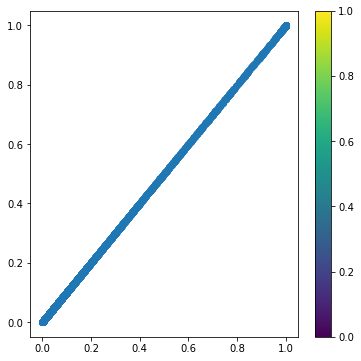

In [11]:
plt.figure(figsize=(6, 6))
plt.scatter(test_decode[:, :], test_decode[:, :])
plt.colorbar()
plt.show()

In [12]:
"""test_predict = test_decode.round()
test_predict"""

'test_predict = test_decode.round()\ntest_predict'

In [13]:
test_predict = test_decode.round()
test_predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
"""test_predict = np.where(test_decode > 0.5, 1, 0)
test_predict"""

'test_predict = np.where(test_decode > 0.5, 1, 0)\ntest_predict'

In [15]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [16]:
#c_matrix.shape

In [17]:
#c_matrix

In [18]:
print('accuracy : ', accuracy_score(one_hot_test_labels, test_predict))
print('precision : ', precision_score(one_hot_test_labels, test_predict, average='micro'))
print('recall : ', recall_score(one_hot_test_labels, test_predict, average='micro'))
print('f1 : ', f1_score(one_hot_test_labels, test_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_test_labels, test_predict))

accuracy :  0.07058823529411765
precision :  0.3632
recall :  0.1366646598434678
f1 :  0.19860017497812774
------------------------
hamming_loss :  0.007478466751030738


In [19]:
"""test_predict_df = pd.DataFrame(test_predict)
test_predict_df"""

'test_predict_df = pd.DataFrame(test_predict)\ntest_predict_df'

In [20]:
#test_predict_df.to_excel('./test_latent_vector.xlsx')